# Importation

In [2]:
import pandas as pd
import ast
# Création du barplot
import seaborn as sns
import matplotlib.pyplot as plt
#WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# Set stop words for English
stop_words = set(stopwords.words('english'))

# Recupération des données

In [3]:

# Lecture du fichier CSV
ratingdf = pd.read_csv('Books_rating_t.csv')
datadf = pd.read_csv('books_data_t.csv')

# Fonction utilitaire

In [4]:
def unwindColumns(df,columnsToUnwind):
    resdf = df
    for col in columnsToUnwind:
        resdf[col] = resdf[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
        resdf = resdf.explode(col)
    return resdf

In [5]:
# Remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# Exploration des données

In [6]:
ratingdf.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [7]:
datadf.head(2)

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [19]:
datadf[np.where(datadf['Auteurs'].str.contains(','), True ,False)]

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
10,Muslim Women's Choices: Religious Belief and S...,Counters the Western views and stereotypes of ...,"['Camillia Fawzi El-Solh', 'Judy Mabro']",http://books.google.com/books/content?id=o7izA...,http://books.google.nl/books?id=o7izAAAAIAAJ&q...,Berg Pub Limited,17/02/1994,http://books.google.nl/books?id=o7izAAAAIAAJ&d...,['Religion'],NaN
13,Vector Quantization and Signal Compression (Th...,"Herb Caen, a popular columnist for the San Fra...","['Allen Gersho', 'Robert M. Gray']",http://books.google.com/books/content?id=GgnrB...,http://books.google.nl/books?id=GgnrBwAAQBAJ&p...,Springer Science & Business Media,06/12/2012,https://play.google.com/store/books/details?id...,['Technology & Engineering'],NaN
21,Eyewitness Travel Guide to Europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",http://books.google.com/books/content?id=h4wor...,http://books.google.nl/books?id=h4worgEACAAJ&d...,NaN,15/06/2015,http://books.google.nl/books?id=h4worgEACAAJ&d...,['Europe'],NaN
35,Mini-mysteries,NaN,NaN,http://books.google.com/books/content?id=mhqyg...,http://books.google.nl/books?id=mhqygn6STHgC&p...,Remedia Publications,NaN,http://books.google.nl/books?id=mhqygn6STHgC&d...,NaN,1.0
36,The Complete Book of Papercrafts: A Truly Comp...,Paper is the ideal medium to experiment with b...,"['Lorenz Books', 'Margaret Malone', 'Paul Jack...",NaN,http://books.google.nl/books?id=RKhkQgAACAAJ&d...,Lorenz Books,2000-01,http://books.google.nl/books?id=RKhkQgAACAAJ&d...,['Crafts & Hobbies'],NaN
...,...,...,...,...,...,...,...,...,...,...
212395,"Essential Guide to Hawaii, the Big Island",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212396,Sofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212398,Autodesk Inventor 10 Essentials Plus,Autodesk Inventor 2017 Essentials Plus provide...,"['Daniel Banach', 'Travis Jones']",http://books.google.com/books/content?id=zxHRC...,http://books.google.com/books?id=zxHRCwAAQBAJ&...,SDC Publications,2016-03,https://play.google.com/store/books/details?id...,['Computers'],NaN
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN


In [17]:
np.where(datadf['Auteurs'].str.contains(','), 1 ,0)

67971

# Preparation des donnée

## Retrait des valeurs null

In [8]:
print(ratingdf.isnull().sum())
ratingdf = ratingdf.dropna(subset=['Titre'])
print(ratingdf.isnull().sum())
print(datadf.isnull().sum())
datadf = datadf.dropna(subset=['Titre'])
print(datadf.isnull().sum())


Id                     0
Titre                208
Prix             2518829
User_id           561787
Nom lecteur       561886
revue/utilité          0
revue/score            0
revue/heure            0
revue/résumé          38
revue/texte            8
dtype: int64
Id                     0
Titre                  0
Prix             2518628
User_id           561774
Nom lecteur       561873
revue/utilité          0
revue/score            0
revue/heure            0
revue/résumé          38
revue/texte            8
dtype: int64
Titre                    1
Description          68442
Auteurs              31413
Image                52075
Lien Google          23836
Editeur              75886
Date publication     25305
infoLink             23836
Genre                41199
Nb scores           162652
dtype: int64
Titre                    0
Description          68441
Auteurs              31413
Image                52075
Lien Google          23836
Editeur              75885
Date publication     25305
in

## Creation de dataset de jointure

In [9]:
merged_df = pd.merge(ratingdf, datadf, on='Titre')
merged_df.shape
merged_df.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN


In [10]:
GenreDF = unwindColumns(datadf,['Genre'])

In [11]:
AuthorDF = unwindColumns(datadf.dropna(subset=['Auteurs']),['Auteurs'])

C:\Users\ray-h\AppData\Local\Temp\ipykernel_2596\1699862696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf[col] = resdf[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)


# Distrubution en fonction des genres

In [10]:

genre_counts = GenreDF['Genre'].value_counts()

# Transformer en DataFrame
genre_counts_df = genre_counts.reset_index()

# Renommer les colonnes pour une meilleure lisibilité
genre_counts_df.columns = ['Genre', 'Nombre de livres']

# Afficher le DataFrame
genre_counts_df.to_csv("distribution_livre.csv")

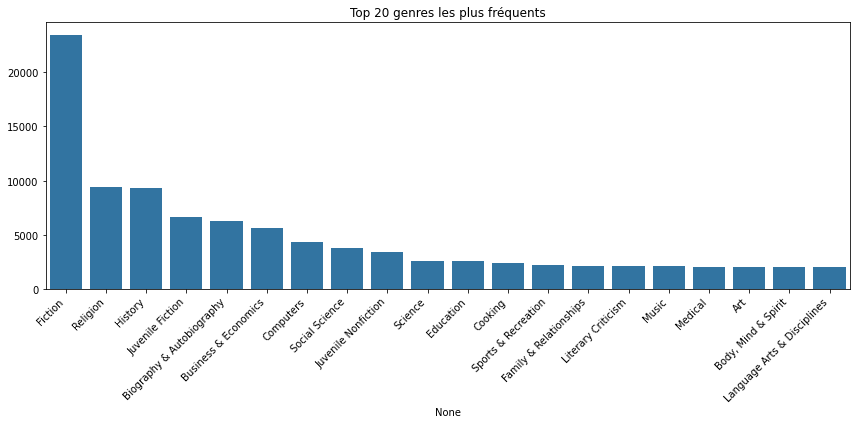

In [11]:
N = 20  # Ajuster selon vos besoins
top_genres = GenreDF['Genre'].value_counts().nlargest(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title(f'Top {N} genres les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Word Cloud Mot les plus frequents

In [17]:
# 2. Les mots les plus fréquents dans les revues ayant obtenues un score >5
# (afficher sous forme de WordCloud)


commentaire =ratingdf[ratingdf['revue/score'] ==5]['revue/texte'].head(500).values
cleaned_commentaire = [remove_stop_words(comment) for comment in commentaire]

In [18]:
text = ' '.join(map(str, cleaned_commentaire))

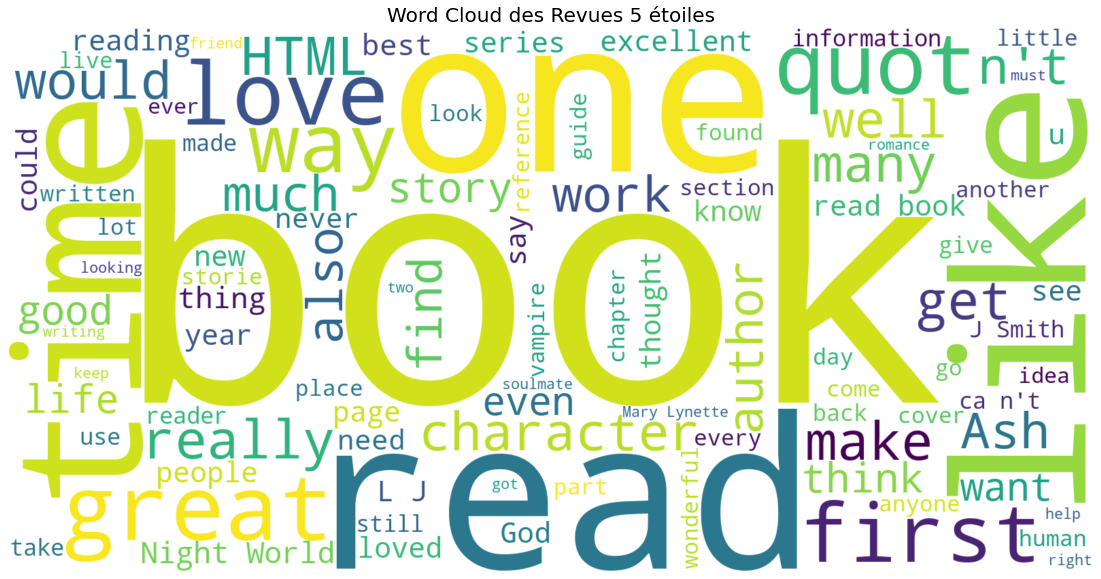

In [19]:
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    stopwords=set(stopwords.words('english')),
    max_words=100
).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud des Revues 5 étoiles', fontsize=20)
plt.show()

# Livres les plus commenté

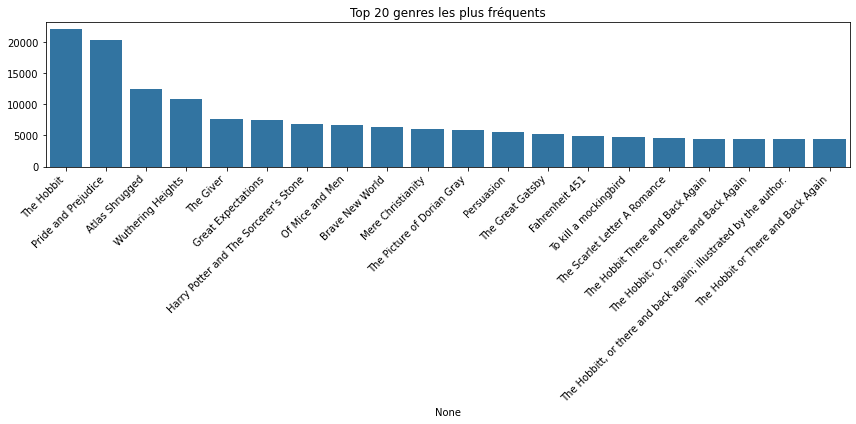

In [12]:
N = 20  # Ajuster selon vos besoins
top_genres = ratingdf['Titre'].value_counts().nlargest(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title(f'Top {N} genres les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Livres les mieux noté

In [13]:
# Calculer la moyenne de chaque colonne pour chaque genre
average_by_title = ratingdf.groupby('Titre')['revue/score'].mean().nlargest(N)

average_by_title

Titre
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                                                     5.0
"A careless word, a needless sinking": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II     5.0
"A careless word-- a needless sinking": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II    5.0
"A giant in the earth,": A biography of Dr. J. B. Boddie,                                                                                                           5.0
"A parallel", the basis of the Book of Mormon: B.H. Roberts' "Parallel" of the Book of Mormon to View of the Hebrews                                                5.0
"All in each place",: A guide to local ecumenism                                                                                                          

# Les Genres avec plus d'avis (Positive et Negative)

In [14]:
merged_genre_df = pd.merge(GenreDF, ratingdf, on='Titre')

In [15]:
positives = merged_genre_df[merged_genre_df['revue/score'] > 3]
negatives = merged_genre_df[merged_genre_df['revue/score'] < 3]


positive_counts = positives['Genre'].value_counts()
negative_counts = negatives['Genre'].value_counts()


print("📊 **Genres avec le plus d'avis positifs**")
print(positive_counts.head(10))  # Top 10 genres les mieux notés

print("\n📉 **Genres avec le plus d'avis négatifs**")
print(negative_counts.head(10))  # Top 10 genres les moins bien no

📊 **Genres avec le plus d'avis positifs**
Fiction                      631792
Juvenile Fiction             180673
Biography & Autobiography     87541
Religion                      81822
History                       72511
Business & Economics          50680
Computers                     30684
Cooking                       25231
Juvenile Nonfiction           25074
Self-Help                     24545
Name: Genre, dtype: int64

📉 **Genres avec le plus d'avis négatifs**
Fiction                      109246
Juvenile Fiction              14307
Biography & Autobiography     11761
Religion                      10577
History                        9800
Business & Economics           9528
Computers                      7809
Political Science              4974
Social Science                 4267
Family & Relationships         4053
Name: Genre, dtype: int64


In [16]:
# Assign 1 if 'revue/score' > 3, otherwise 0
merged_genre_df['positive'] = np.where(merged_genre_df['revue/score'] > 3, 1, 0)

# Assign 1 if 'revue/score' < 3, otherwise 0
merged_genre_df['negative'] = np.where(merged_genre_df['revue/score'] < 3, 1, 0)

# Assign 1 if 'revue/score' == 3, otherwise 0
merged_genre_df['neutral'] = np.where(merged_genre_df['revue/score'] == 3, 1, 0)


df_frequencies = merged_genre_df.groupby('Genre').agg(
    positive_sum=('positive', 'sum'),
    negative_sum=('negative', 'sum'),
    neutral_sum=('neutral', 'sum'),
    total_count=('positive', 'count')
)

positive_frequencies = pd.DataFrame({
    'frequency': df_frequencies['positive_sum'] / df_frequencies['total_count'],
    'total': df_frequencies['total_count']
})

# Assign frequency and total count for neutral reviews
neutral_frequencies = pd.DataFrame({
    'frequency': df_frequencies['neutral_sum'] / df_frequencies['total_count'],
    'total': df_frequencies['total_count']
})

# Assign frequency and total count for negative reviews
negative_frequencies = pd.DataFrame({
    'frequency': df_frequencies['negative_sum'] / df_frequencies['total_count'],
    'total': df_frequencies['total_count']
})

print("📊 **Genres avec le plus d'avis positifs**")
print(positive_frequencies.sort_values(by='frequency',ascending=False).head(10))  # Top 10 genres les mieux notés

print("\n📉 **Genres avec le plus d'avis négatifs**")
print(negative_frequencies.sort_values(by='frequency',ascending=False).head(10))  # Top 10 genres les moins bien no

📊 **Genres avec le plus d'avis positifs**
                      frequency  total
Genre                                 
Śaivism                     1.0      4
Pack goats                  1.0      1
Dramatic music              1.0      1
Drama, French               1.0      1
Drama in education          1.0      5
Drainage                    1.0      2
Patent suits                1.0      3
Pathology, Cellular         1.0      1
Drag (Aerodynamics).        1.0      2
Draft horses                1.0      7

📉 **Genres avec le plus d'avis négatifs**
                                     frequency  total
Genre                                                
Hosiery                                    1.0      1
Natural history.                           1.0      1
Washington (Washington County, Pa.)        1.0      1
Christianisme - Relations - Islam          1.0      1
Breviaries                                 1.0      1
Sanskrit philology                         1.0      1
Elastic fabrics

# Top 10 auteurs

In [14]:
merged_author_df = pd.merge(AuthorDF, ratingdf, on='Titre')

In [16]:
positives = merged_author_df[merged_author_df['revue/score'] == 5]
negatives = merged_author_df[merged_author_df['revue/score'] == 1]


positive_counts = positives['Auteurs'].value_counts()
negative_counts = negatives['Auteurs'].value_counts()


print("📊 **Auteur avec le plus d'avis 5 étoiles**")
print(positive_counts.head(10))  # Top 10 genres les mieux notés

print("\n📉 **Auteur avec le plus d'avis 1 étoiles**")
print(negative_counts.head(10))  # Top 10 genres les moins bien no

📊 **Auteur avec le plus d'avis 5 étoiles**
J. R. R. Tolkien             29267
Jane Austen                  25305
Charles Dickens              13511
Harper Lee                   10767
John Steinbeck               10751
John Ronald Reuel Tolkien    10193
C. S. Lewis                   9079
J. K. Rowling                 8324
Charlotte Brontë              8317
Kurt Vonnegut                 7440
Name: Auteurs, dtype: int64

📉 **Auteur avec le plus d'avis 1 étoiles**
Robert Jordan              2563
Jane Austen                1479
Charles Dickens            1417
Thomas Harris              1387
Tom Clancy                 1272
BusinessNews Publishing    1098
Emily Bronte                929
James Patterson             927
J. R. R. Tolkien            907
William Golding             900
Name: Auteurs, dtype: int64


In [ ]:
average_by_name_asc = merged_df.groupby('Auteurs')['revue/score'].mean().nlargest(N).head(10)

# Distribution avis dans corpus

In [19]:
# 10. Distribution des sentiments négatifs, neutres et positifs dans l'ensemble du corpus
distriNegatif =ratingdf[ratingdf['revue/score'] <3]['Id'].count()
distriPositif =ratingdf[ratingdf['revue/score'] >3]['Id'].count()
distriNeutre =ratingdf[ratingdf['revue/score'] ==3]['Id'].count()
total = ratingdf['Id'].count()
moyenneNegatif = distriNegatif/total
moyennePositif = distriPositif/total
moyenneNeutre = distriNeutre/total
print(moyenneNegatif)
print(moyennePositif)
print(moyenneNeutre)





0.11758581928347032
0.797645970120595
0.08476821059593465


# Correlations

In [91]:
AuthorDF_train, _ = train_test_split(AuthorDF[['Auteurs']], test_size=0.2)
Author_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
Author_enc.fit(AuthorDF_train)

AuthorDF_encoded = AuthorDF.copy()
AuthorDF_encoded[['Auteurs']] = Author_enc.transform(AuthorDF[['Auteurs']])
 

In [93]:
display(AuthorDF_encoded)

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,Its Only Art If Its Well Hung!,NaN,65501.0,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,96179.0,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,26204.0,http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[Religion],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,122054.0,http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[Fiction],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,32670.0,NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,01/03/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",34703.0,http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,01/06/2000,http://books.google.com/books?id=J7M-NwAACAAJ&...,[Juvenile Fiction],2.0
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",124544.0,NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,17/01/2018,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,127568.0,http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,12/08/2003,https://play.google.com/store/books/details?id...,[Fiction],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,24491.0,http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,01/01/1998,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [94]:
EditorDF_train, _ = train_test_split(AuthorDF[['Editeur']], test_size=0.2)
Editor_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
Editor_enc.fit(EditorDF_train)

EditorDF_encoded = AuthorDF_encoded.copy()
EditorDF_encoded[['Editeur']] = Editor_enc.transform(AuthorDF[['Editeur']])

In [95]:
EditorDF_encoded

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,Its Only Art If Its Well Hung!,NaN,65501.0,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,96179.0,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,71.0,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,26204.0,http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[Religion],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,122054.0,http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,14159.0,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[Fiction],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,32670.0,NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,01/03/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",34703.0,http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,11274.0,01/06/2000,http://books.google.com/books?id=J7M-NwAACAAJ&...,[Juvenile Fiction],2.0
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",124544.0,NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,17/01/2018,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,127568.0,http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,13256.0,12/08/2003,https://play.google.com/store/books/details?id...,[Fiction],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,24491.0,http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,2032.0,01/01/1998,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [100]:
merged_corr_df = pd.merge(EditorDF_encoded, ratingdf, on='Titre')[['Auteurs','Editeur','Prix','revue/score']]

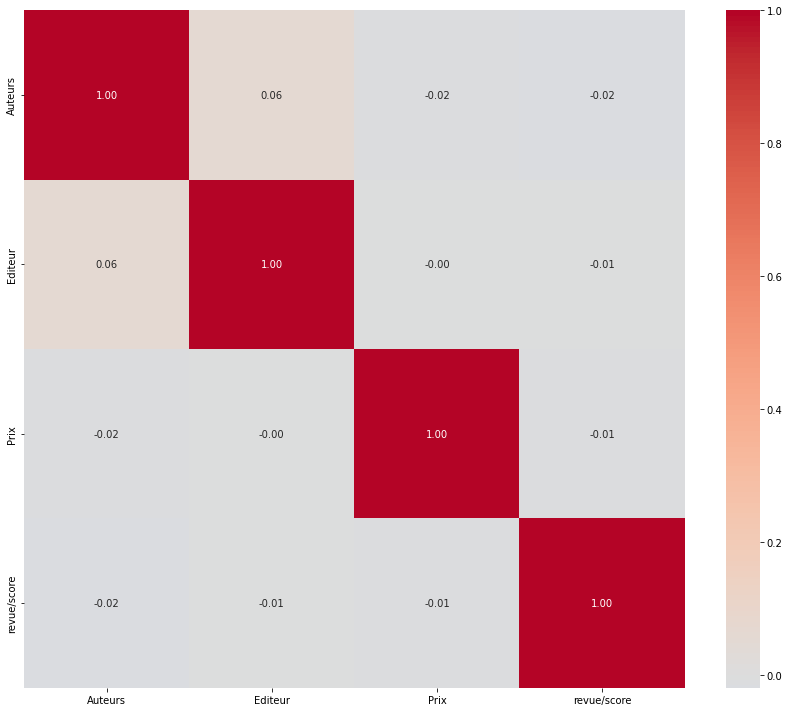

In [101]:
# 8. Existe t-il une corrélation entre l’éditeur et le commentaire (score)
# 9. Existe-t-il une corrélation entre les auteurs et le commentaire (score).
correlation_matrix = merged_corr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,        
            cmap='coolwarm',   
            center=0,         
            fmt='.2f')   


plt.tight_layout()
plt.show()

# Nombre le plus élevé de critiques négatives/positives/neutres sur les livres

In [13]:
positives = merged_df[merged_df['revue/score'] > 3]
negatives = merged_df[merged_df['revue/score'] < 3]
neutral = merged_df[merged_df['revue/score'] == 3]


positive_counts = positives['Titre'].value_counts()
negative_counts = negatives['Titre'].value_counts()
neutral_counts = neutral['Titre'].value_counts()


print("📊 **Livres avec le plus d'avis positifs**")
print(positive_counts.head(10))  # Top 10 genres les mieux notés

print("\n📉 **Livres avec le plus d'avis négatifs**")
print(negative_counts.head(10))  # Top 10 genres les moins bien no

print("\n📉 **Livres avec le plus d'avis neutre**")
print(neutral_counts.head(10))  # Top 10 genres les moins bien no

📊 **Livres avec le plus d'avis positifs**
The Hobbit                               20455
Pride and Prejudice                      18013
Atlas Shrugged                            9216
Wuthering Heights                         7992
The Giver                                 6442
Harry Potter and The Sorcerer's Stone     6395
Great Expectations                        5747
Of Mice and Men                           5746
Mere Christianity                         5242
Brave New World                           5144
Name: Titre, dtype: int64

📉 **Livres avec le plus d'avis négatifs**
Atlas Shrugged                                                         2305
Crossroads of Twilight (The Wheel of Time, Book 10)                    1959
Wuthering Heights                                                      1529
Pride and Prejudice                                                    1273
The Bear and the Dragon                                                1242
Great Expectations                     

# A voir

In [12]:
merged_df.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
